In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = np.loadtxt('ex2/ex2data2.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2]

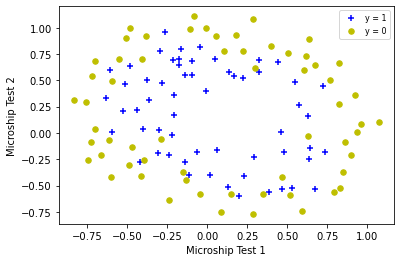

In [11]:
def plotData(X, y):
    pos = np.where(y == 1)
    neg = np.where(y == 0)
    p1 = plt.scatter(X[pos, 0], X[pos, 1], marker='+', s=30, color='b')
    p2 = plt.scatter(X[neg, 0], X[neg, 1], marker='o', s=30, color='y')
    plt.legend((p1, p2), ('y = 1', 'y = 0'), loc='upper right', fontsize=8)
    plt.xlabel('Microship Test 1')
    plt.ylabel('Microship Test 2')
    plt.show
plotData(X, y)

# =========== Part 1: Regularized Logistic Regression ============

In [12]:
def mapFeature(x1, x2):
    degree = 6
    col = int(degree*(degree+1)/2+degree+1)
    out = np.ones((np.size(x1, 0), col))
    count = 1
    for i in range(1, degree+1):
        for j in range(i+1):
            out[:, count] = np.power(x1, i-j)*np.power(x2, j)
            count += 1
    return out

X = mapFeature(X[:, 0], X[:, 1])

In [13]:
# initialize fitting parameters
initial_theta = np.zeros(np.size(X), 1)

# set regularization parameter lamda to 1
lambda = 1



array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         6.29470940e-04,  8.58939846e-03,  1.17205992e-01],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
         1.89305413e-03, -1.39810280e-02,  1.03255971e-01],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
         1.04882142e-02, -3.39734512e-02,  1.10046893e-01],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
         2.34007252e-01, -4.82684337e-01,  9.95627986e-01],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
         4.00328554e-05, -6.31330588e-03,  9.95627986e-01],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
         3.51474517e-07, -1.70067777e-08,  8.22905998e-10]])